# Analisis de un portafolio con varios activos



## Instalar paquetes

In [1]:
import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import yfinance as yf

warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings('ignore')

## Crear función descargar datos

Crear función para descargar información de varios activos al mismo tiempo.
Los datos quedan guardados en un activo tipo pandas.core

In [2]:

def getMultiAssetData(ticketList, start_date, end_date,interval='1d'):
    def getData(ticker):
        data = yf.download(ticker, start_date, end_date,interval=interval)
        return data
    datas = map(getData, ticketList) #Aplicar la función GetData al array "TicketList"
    return pd.concat(datas, keys=ticketList, names=['Ticker', 'Date'])

## Descargar datos

Indicar los tickers (deben coincidir con el ticker de Investing) y las fechas para descargar los datos

In [3]:
Lista = ['AAPL', 'AMZN','BAC', 'JNJ']  #Activos U.S.
# Lista = ['AAPL', 'AMZN','BAC', 'JNJ', 'KO', 'XOM', 'PG','WMT','PFE','MSFT','GOOG','SPY']  #Activos U.S.
#Lista=['AXXJ','ACWI','ARCC','ARCO','BRK.B','CSTNL','DXJ','GSBD','IAU','ILF','MRCC','NU','PCLOF','QQQ','SMH','TCPC','USMV','VTV','WFC','XLP','SUWS']
#Lista = ['QQQ','SPY','DJI','AGG','ACWI','GXG','COP=X']  # Indices U.S.
#Lista = ['ECOPETROL.CL', 'PFBCOLOM.CL' ,'ISA.CL' ,'PFGRUPSURA.CL','PFAVAL.CL'] #Activos Col
#Lista = ['^SPCOSLCP','COP=X', 'SPY' ,'AGG' ,'ILF','DBC','IJH','VO','SCHM','IWM','VBR','SCHA','VTV','IVW','VGK','AIA','EWJ','VWO','EWZ','EWW','ECH','GLD','USO','COPA.L','USMV','MTUM','SIZE','XLK','XLE','XLF'] #Activos Col

inicio = '2017-03-28'
final = '2023-03-28'

In [4]:
data=getMultiAssetData(ticketList=Lista, start_date=inicio, end_date=final, interval='1mo')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df = data.copy()
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,288.000000,288.000000,288.000000,288.000000,288.000000,2.880000e+02
mean,95.335281,101.240983,89.823802,95.897998,92.067591,1.383871e+09
std,53.266531,55.798050,50.532912,53.208257,51.594834,9.691611e+08
min,19.930000,24.309999,17.950001,21.230000,19.695683,9.374220e+07
25%,41.645625,43.432501,37.976252,41.536250,39.865288,5.515644e+08
50%,94.597252,101.724751,88.377502,95.503750,95.503750,1.414148e+09
75%,144.370003,153.147499,135.859997,145.784996,136.764416,1.889147e+09
max,180.470001,188.654007,175.520004,180.460007,176.032761,6.280072e+09


In [10]:
df

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2017-04-01   35.927502   36.365002   35.014999   35.912498   33.656422   
       2017-05-01   36.275002   39.162498   36.067501   38.189999   35.790840   
       2017-06-01   38.292500   38.994999   35.549999   36.005001   33.882393   
       2017-07-01   36.220001   38.497501   35.602501   37.182499   34.990475   
       2017-08-01   37.275002   41.130001   37.102501   41.000000   38.582920   
...                       ...         ...         ...         ...         ...   
JNJ    2022-11-01  174.059998  178.119995  166.820007  178.000000  174.280563   
       2022-12-01  179.000000  181.039993  174.070007  176.649994  174.075119   
       2023-01-01  176.160004  180.929993  161.050003  163.419998  161.037979   
       2023-02-01  162.990005  166.339996  153.039993  153.259995  151.026062   
       2023-03-01  153.009995  156.250000  150.110001  155.000000  153.839279   

                       Volume  
Ticker Date                    
AAPL   2017-04-01  1493216400  
       2017-05-01  2615927200  
       2017-06-01  2736712400  
       2017-07-01  1688047600  
       2017-08-01  2644276000  
...                       ...  
JNJ    2022-11-01   138341800  
       2022-12-01   129803700  
       2023-01-01   160524000  
       2023-02-01   164776500  
       2023-03-01   185723800  

[288 rows x 6 columns]

Al descargar los datos por acción estos van a ser guardados en una especie de armario, donde hay una "caja" con la información de cada acción. Entonces cada "caja" de acción guardada en el armario "df" puede ser llamada con la función de atributo ".loc"

In [9]:
df.loc['JNJ']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-01,124.730003,125.809998,120.949997,123.470001,104.590294,106205200
2017-05-01,123.400002,128.800003,122.339996,128.250000,108.639397,112541500
2017-06-01,128.320007,137.000000,128.119995,132.289993,112.804787,145558900
2017-07-01,132.789993,137.080002,129.570007,132.720001,113.171471,107885800
2017-08-01,133.169998,134.970001,130.899994,132.369995,112.873009,107061100
...,...,...,...,...,...,...
2022-11-01,174.059998,178.119995,166.820007,178.000000,174.280563,138341800
2022-12-01,179.000000,181.039993,174.070007,176.649994,174.075119,129803700
2023-01-01,176.160004,180.929993,161.050003,163.419998,161.037979,160524000


Igualmente, se puede revisar las columnas comunes en cada "caja" usando doble corchete "[["

In [ ]:
df.loc['JNJ'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1.299000e+03
mean,150.835959,152.006474,149.598299,150.829623,141.189482,7.467042e+06
std,17.081782,17.129371,17.083788,17.116594,21.104486,3.417814e+06
min,117.000000,118.559998,109.160004,111.139999,102.753571,2.114900e+06
25%,136.279999,137.439995,135.139999,136.440002,122.465378,5.561400e+06
50%,148.399994,149.339996,146.899994,148.240005,137.858444,6.684400e+06
75%,165.849998,167.065002,164.414993,165.775002,160.993744,8.321850e+06
max,185.100006,186.690002,184.179993,186.009995,181.108826,5.814020e+07


## Retornos diarios

Extraer de cada activo la columna de precios de cierre y organizar en una tabla tipo DataFrame

In [ ]:
df = data.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

Ticker,AGG,AIA,COP=X,COPA.L,DBC,ECH,EWJ,EWW,EWZ,GLD,...,USMV,USO,VBR,VGK,VO,VTV,VWO,XLE,XLF,XLK
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-01,98.290001,58.200001,4809.339844,32.895000,25.490000,27.110001,55.799999,53.900002,31.480000,164.809998,...,75.260002,70.230003,169.539993,56.790001,216.529999,146.240005,40.520000,91.150002,36.310001,135.960007
2022-12-01,96.989998,56.740002,4846.919922,33.820000,24.650000,27.090000,54.439999,49.450001,27.969999,169.639999,...,72.099998,70.110001,158.800003,55.439999,203.809998,140.369995,38.980000,87.470001,34.200001,124.440002
2023-01-01,100.220001,64.849998,4600.430176,37.310001,24.870001,29.260000,58.669998,57.650002,30.340000,179.410004,...,73.199997,69.320000,173.210007,60.740002,220.020004,144.279999,42.230000,89.930000,36.560001,135.960007
2023-02-01,97.309998,58.349998,4777.259766,36.134998,23.760000,28.110001,55.939999,57.639999,27.270000,169.779999,...,70.639999,67.209999,169.300003,59.700001,214.080002,139.610001,39.419998,83.690002,35.720001,136.520004
2023-03-01,98.930000,61.349998,4675.250000,36.055000,23.500000,28.440001,57.490002,58.340000,26.680000,183.440002,...,70.930000,64.550003,154.220001,58.930000,203.149994,134.520004,39.990002,80.779999,31.410000,144.149994


Hallar los retornos logaritmicos. Recordar que \{$Ln\left(\frac{VF}{VI} \right)=Ln(VF)-Ln(VI)$}. y guardar en el DataFrame 'returns_portafolio_ln' 


In [ ]:
returns_portfolio_ln = np.log(closePriceTable)-np.log(closePriceTable.shift(1))
returns_portfolio_ln=returns_portfolio_ln.dropna()
returns_portfolio_ln.tail()

Ticker,AAPL,AMZN,BAC,GOOG,JNJ,KO,MSFT,PFE,PG,SPY,WMT,XOM
Date,,,,,,,,,,,,
2023-02-23,0.003285,0.000313,-0.000875,-0.007984,-0.000317,0.001832,0.012878,-0.001890,-0.003208,0.005305,-0.015018,0.009162
2023-02-24,-0.018169,-0.024510,-0.001460,-0.019067,-0.011221,-0.004169,-0.022025,-0.013088,-0.005657,-0.010740,0.002671,0.000090
2023-02-27,0.008214,0.002777,0.000000,0.008359,-0.002182,-0.000334,0.003765,-0.023508,-0.000862,0.003400,-0.007256,-0.001807
2023-02-28,-0.003454,0.005000,0.002627,0.002217,-0.015346,-0.005196,-0.002963,-0.005163,-0.011420,-0.003703,0.004867,-0.005806
2023-03-01,-0.014348,-0.022104,-0.004676,0.002323,-0.004512,-0.010983,-0.012710,-0.009660,0.000727,-0.003843,-0.014029,0.008877


## Gráfica e información de distribuciones por activo

Graficar el historgrama de los retornos logartimicos de cada activo

<ipython-input-13-56b90dc7e4f7>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  returns_portfolio_ln.hist(bins=50, ax=ax2)


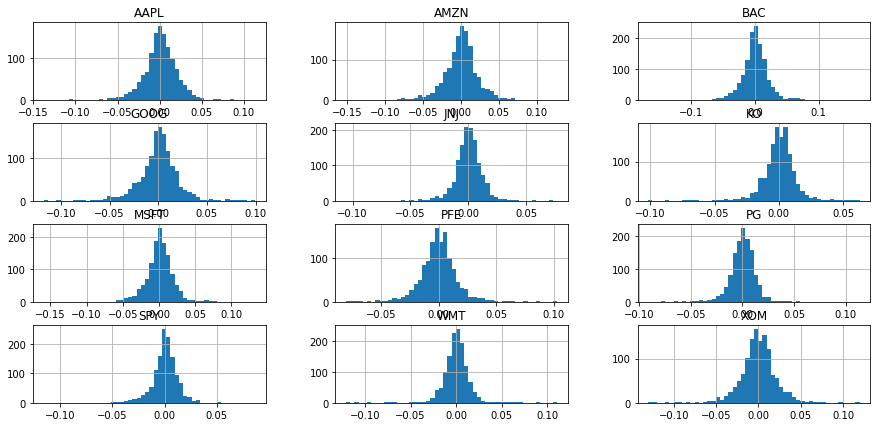

In [ ]:
%matplotlib inline
fig2 = plt.figure(figsize=(15, 7))
ax2 = fig2.add_subplot(1, 1, 1)
returns_portfolio_ln.hist(bins=50, ax=ax2)
ax2.set_xlabel('Return')
ax2.set_ylabel('Frequency')
ax2.set_title('Portfolio Return Distribution')
plt.show()

Estadistica descriptiva de los retornos logaritmicos de cada activo

In [ ]:
(returns_portfolio_ln*100).describe()

Ticker,AAPL,AMZN,BAC,GOOG,JNJ,KO,MSFT,PFE,PG,SPY,WMT,XOM
count,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000
mean,0.093695,0.033782,0.010217,0.040868,0.007049,0.019767,0.081099,0.011579,0.032187,0.029613,0.027099,0.020457
std,2.097863,2.272836,2.206742,2.000989,1.314711,1.362023,1.959995,1.651385,1.373295,1.358348,1.474373,2.130473
min,-13.770805,-15.139791,-16.720458,-11.766725,-10.578145,-10.172796,-15.945341,-8.050144,-9.142849,-11.588654,-12.076467,-13.039097
25%,-0.915141,-1.077423,-1.006653,-0.881414,-0.593528,-0.546571,-0.850468,-0.859900,-0.594504,-0.529766,-0.642707,-1.061594
50%,0.111779,0.126682,0.046411,0.105036,0.032092,0.068905,0.109330,0.000000,0.072461,0.068635,0.040353,0.004516
75%,1.231218,1.191730,1.066751,1.087015,0.643439,0.675797,1.086903,0.821014,0.719329,0.711543,0.721645,1.105404
max,11.315748,12.694892,16.378578,9.937954,7.693992,6.278296,13.292898,10.305460,11.340937,8.673099,11.072266,11.944208


Graficar el kernel (distribución marginal) de los rendimientos logaritmicos.

<ipython-input-15-fa752ffdebdd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns_portfolio_ln[i], hist=False, rug=True, label=i)
<ipython-input-15-fa752ffdebdd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns_portfolio_ln[i], hist=False, rug=True, label=i)
<ipy

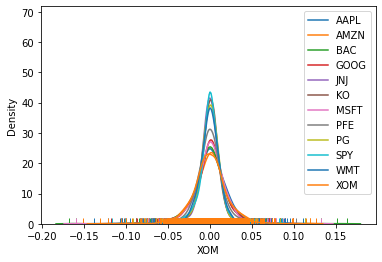

In [ ]:
import seaborn as sns
plt.figure("Test Plots")
for i in returns_portfolio_ln.columns.values:
  sns.distplot(returns_portfolio_ln[i], hist=False, rug=True, label=i)
plt.legend()
plt.show()

In [ ]:
closePriceTable.columns.values

array(['AAPL', 'AMZN', 'BAC', 'GOOG', 'JNJ', 'KO', 'MSFT', 'PFE', 'PG',
       'SPY', 'WMT', 'XOM'], dtype=object)

Graficar los precios NO escalonados. Para escalonar se debe dibidir cada columna por su valor inicial. 

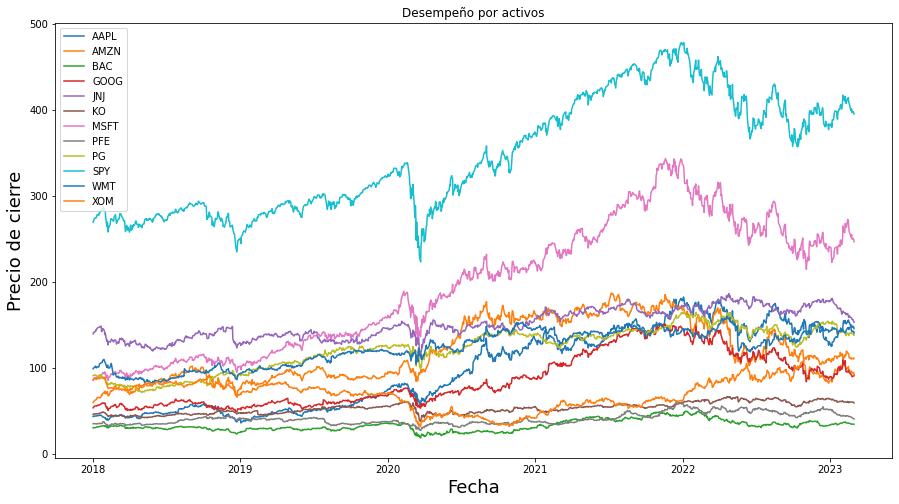

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

for i in closePriceTable.columns.values :
    ax.plot(closePriceTable[i], label = i)
ax.set_title("Desempeño por activos")
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Precio de cierre' , fontsize=18)
ax.legend(closePriceTable.columns.values , loc = 'upper left')
plt.show(fig)

## Matriz de correlaciones

Hallar la matriz de correlaciones. Dado que tenemos retornos diarios se multiplica por 252 dias bursatiles para obtener los valores anuales.

In [ ]:
var_matrix=returns_portfolio_ln.cov()*252
var_matrix

Ticker,AAPL,AMZN,BAC,GOOG,JNJ,KO,MSFT,PFE,PG,SPY,WMT,XOM
Ticker,,,,,,,,,,,,
AAPL,0.110906,0.077529,0.055966,0.073585,0.028625,0.030140,0.079594,0.030396,0.031054,0.057667,0.029429,0.039401
AMZN,0.077529,0.130178,0.044553,0.079006,0.020335,0.019771,0.080350,0.023141,0.020808,0.052440,0.026938,0.027029
BAC,0.055966,0.044553,0.122717,0.055429,0.030355,0.038708,0.055258,0.033912,0.029405,0.056391,0.024044,0.073408
GOOG,0.073585,0.079006,0.055429,0.100900,0.025390,0.027517,0.078975,0.027325,0.025625,0.054045,0.024530,0.039460
JNJ,0.028625,0.020335,0.030355,0.025390,0.043557,0.025026,0.029725,0.030191,0.027003,0.026143,0.020627,0.022990
KO,0.030140,0.019771,0.038708,0.027517,0.025026,0.046749,0.030651,0.025062,0.030243,0.030077,0.020099,0.031862
MSFT,0.079594,0.080350,0.055258,0.078975,0.029725,0.030651,0.096808,0.031955,0.031865,0.057028,0.030250,0.036496
PFE,0.030396,0.023141,0.033912,0.027325,0.030191,0.025062,0.031955,0.068722,0.024841,0.028355,0.019042,0.026261
PG,0.031054,0.020808,0.029405,0.025625,0.027003,0.030243,0.031865,0.024841,0.047526,0.027087,0.026171,0.018705


Matriz de correlaciones y sus representación gráfica

In [ ]:
correlation_matrix = returns_portfolio_ln.corr(method='pearson')
correlation_matrix

Ticker,AAPL,AMZN,BAC,GOOG,JNJ,KO,MSFT,PFE,PG,SPY,WMT,XOM
Ticker,,,,,,,,,,,,
AAPL,1.000000,0.645240,0.479728,0.695614,0.411852,0.418581,0.768154,0.348175,0.427733,0.803047,0.377566,0.349823
AMZN,0.645240,1.000000,0.352498,0.689359,0.270049,0.253446,0.715753,0.244662,0.264540,0.674036,0.319004,0.221503
BAC,0.479728,0.352498,1.000000,0.498124,0.415197,0.511046,0.506979,0.369279,0.385043,0.746525,0.293261,0.619606
GOOG,0.695614,0.689359,0.498124,1.000000,0.382991,0.400662,0.799075,0.328147,0.370052,0.789039,0.329942,0.367309
JNJ,0.411852,0.270049,0.415197,0.382991,1.000000,0.554591,0.457760,0.551817,0.593490,0.580921,0.422274,0.325708
KO,0.418581,0.253446,0.511046,0.400662,0.554591,1.000000,0.455623,0.442163,0.641617,0.645127,0.397174,0.435728
MSFT,0.768154,0.715753,0.506979,0.799075,0.457760,0.455623,1.000000,0.391777,0.469786,0.850010,0.415395,0.346826
PFE,0.348175,0.244662,0.369279,0.328147,0.551817,0.442163,0.391777,1.000000,0.434673,0.501619,0.310360,0.296197
PG,0.427733,0.264540,0.385043,0.370052,0.593490,0.641617,0.469786,0.434673,1.000000,0.576214,0.512923,0.253702


Correlación activos en el portafolio


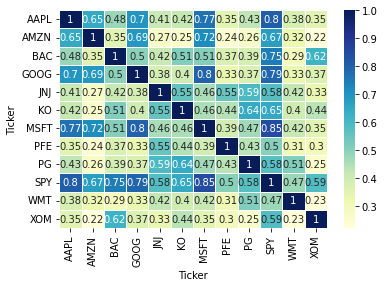

In [ ]:
fig1 = plt.figure()
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlación activos en el portafolio')
plt.show(fig1)

¿Pueden los retornos pasados explicar los retornos presentes?

[Text(0.5, 0, 'Retornos T'), Text(0, 0.5, 'Retornos T+1')]

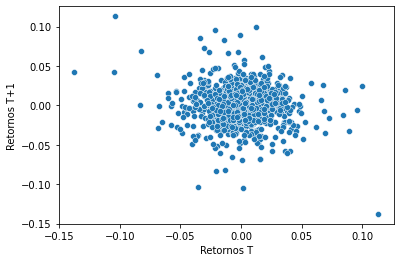

In [ ]:
from scipy.stats.mstats import winsorize
sns.scatterplot(y=returns_portfolio_ln['AAPL'], x=returns_portfolio_ln['AAPL'].shift(1)).set(xlabel="Retornos T", ylabel="Retornos T+1")

## Relación de rendimiento-Riesgo por activo

Gráfica de cada activo en el plano Rendimiento (eje vertical) y riesgo (plano horizontal)

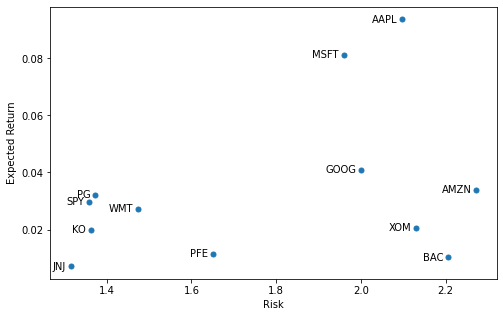

In [ ]:
plt.figure(figsize=(8,5))

plt.scatter((returns_portfolio_ln*100).std(),(returns_portfolio_ln*100).mean(),s=25)

plt.xlabel('Risk')
plt.ylabel('Expected Return')


#For adding annotatios in the scatterplot
for label,x,y in zip(returns_portfolio_ln.columns,(returns_portfolio_ln*100).std(),(returns_portfolio_ln*100).mean()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-5,-5),
    textcoords = 'offset points', ha = 'right', va = 'bottom',)
    #arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

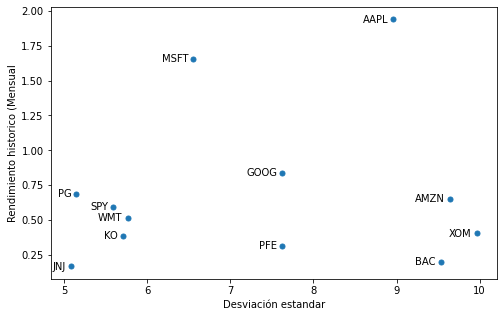

In [ ]:
monthly_returns_ln = np.log(closePriceTable)-np.log(closePriceTable.shift(20))
plt.figure(figsize=(8,5))

plt.scatter(y=(monthly_returns_ln*100).mean(),x=(monthly_returns_ln*100).std(),s=25)

plt.xlabel('Desviación estandar')
plt.ylabel('Rendimiento historico (Mensual')


#For adding annotatios in the scatterplot
for label,x,y in zip(monthly_returns_ln.columns,(monthly_returns_ln*100).std(),(monthly_returns_ln*100).mean()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-5,-5),
    textcoords = 'offset points', ha = 'right', va = 'bottom')

## Creación de un portafolio

### Portafolio equally-weighted

In [ ]:
monthly_returns_ln.columns
monthly_returns_ln=monthly_returns_ln.dropna()

In [ ]:
n_activos=len(monthly_returns_ln.columns) #Contar numero de activos
ew=1/n_activos #
pesos=np.repeat(ew, n_activos)
pesos

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333])

In [ ]:
retorno_port=monthly_returns_ln.dot(pesos)
retorno_port.head()

Date
2018-01-31    0.049083
2018-02-01    0.040287
2018-02-02    0.014120
2018-02-05   -0.037108
2018-02-06   -0.020827
dtype: float64

In [ ]:
port_retornos=[]
port_volatilidad=[]
port_pesos=[]

num_portafolios=10000


In [ ]:
retorno_activo=monthly_returns_ln.mean()*12
retorno_activo

Ticker
AAPL    0.232774
AMZN    0.078476
BAC     0.023685
GOOG    0.100374
JNJ     0.019998
KO      0.046451
MSFT    0.198702
PFE     0.037587
PG      0.082604
SPY     0.071197
WMT     0.061838
XOM     0.048562
dtype: float64

### Simulación de N portafolios aleitorizando los pesos de cada activo en cada una de las simulaciones

In [ ]:
for port in range(num_portafolios):
  pesos=np.random.random(n_activos)
  pesos=pesos/np.sum(pesos)
  port_pesos.append(pesos)

  retornos=np.dot(pesos,retorno_activo)
  port_retornos.append(retornos)

  var=var_matrix.mul(pesos,axis=0).mul(pesos,axis=1).sum().sum()
  sd=np.sqrt(var)
  ann_sd=sd
  port_volatilidad.append(ann_sd)

Organizar cada simulación en una fila. Cada fila (portafolio simulado) contine los pesos por activo, rendimiento esperado del portafolio y riesgo esperado del portafolio. 

In [ ]:
data={'Retornos':port_retornos,'Riesgo':port_volatilidad,}
for counter, Ticker in enumerate(monthly_returns_ln.columns.tolist()):
  data[Ticker+' pesos']=[w[counter] for w in port_pesos]
data=pd.DataFrame(data)

In [ ]:
data

,Retornos,Riesgo,AAPL pesos,AMZN pesos,BAC pesos,GOOG pesos,JNJ pesos,KO pesos,MSFT pesos,PFE pesos,PG pesos,SPY pesos,WMT pesos,XOM pesos
0,0.086701,0.207013,0.091345,0.065864,0.070689,0.106313,0.132967,0.036133,0.097386,0.009592,0.044685,0.084025,0.115058,0.145942
1,0.078505,0.205756,0.025823,0.111012,0.099499,0.085930,0.025240,0.114734,0.104122,0.086712,0.109718,0.085991,0.036827,0.114391
2,0.078918,0.194909,0.016036,0.013746,0.101379,0.077998,0.082737,0.032119,0.141400,0.057911,0.127890,0.014964,0.197055,0.136763
3,0.080166,0.204989,0.106146,0.127583,0.072174,0.058920,0.173110,0.007335,0.039166,0.026934,0.141535,0.058834,0.015263,0.172999
4,0.079680,0.193296,0.067211,0.086058,0.053484,0.046569,0.025543,0.125707,0.046157,0.037889,0.136518,0.139535,0.132256,0.103071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.082272,0.204960,0.058356,0.027583,0.135174,0.027773,0.113397,0.042476,0.167325,0.130522,0.038465,0.054557,0.086873,0.117499
9996,0.065465,0.206738,0.028008,0.129225,0.122080,0.118727,0.078537,0.101634,0.028531,0.122306,0.070003,0.083420,0.000698,0.116831
9997,0.097919,0.215236,0.125227,0.101098,0.105251,0.104285,0.081506,0.015464,0.127505,0.120659,0.091765,0.051207,0.055600,0.020434
9998,0.091017,0.213040,0.125670,0.078177,0.110785,0.119551,0.148403,0.067503,0.109014,0.109760,0.026508,0.062746,0.031995,0.009889


Grafica de cada uno de los portafolio simulados. Cada punto corresponde al riesgo y retorno esperado de una de las simulaciones. 

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Riesgo', ylabel='Retornos'>

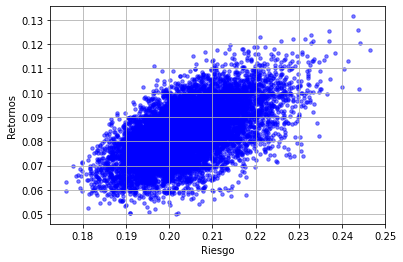

In [ ]:
data.plot.scatter(x='Riesgo', y='Retornos', marker='o', color='b',s=12,alpha=0.5,grid=True)

Hallar portafolio de maxima volatilidad entre los N portafolios simulados. 

In [ ]:
min_vol_port=data.iloc[data['Riesgo'].idxmin()]
min_vol_port

Retornos      0.063402
Riesgo        0.176012
AAPL pesos    0.035462
AMZN pesos    0.002579
BAC pesos     0.001788
GOOG pesos    0.074074
JNJ pesos     0.128809
KO pesos      0.151404
MSFT pesos    0.006253
PFE pesos     0.146417
PG pesos      0.161894
SPY pesos     0.077172
WMT pesos     0.139048
XOM pesos     0.075101
Name: 7226, dtype: float64

Hallar portafolio de maxima razón de sharpe entre los portafolio simulados.

In [ ]:
rf=0.01
optimal_portfolio=data.iloc[((data['Retornos']-rf)/data['Riesgo']).idxmax()]
optimal_portfolio

Retornos      0.110919
Riesgo        0.196413
AAPL pesos    0.168923
AMZN pesos    0.014904
BAC pesos     0.003604
GOOG pesos    0.001562
JNJ pesos     0.008909
KO pesos      0.074833
MSFT pesos    0.156556
PFE pesos     0.112900
PG pesos      0.172833
SPY pesos     0.025472
WMT pesos     0.187418
XOM pesos     0.072086
Name: 5997, dtype: float64

Grafica de las N simulaciones, incluyendo el portafolio de máxima razón de sharpe, portafolio de minima volatilidad y frontera.

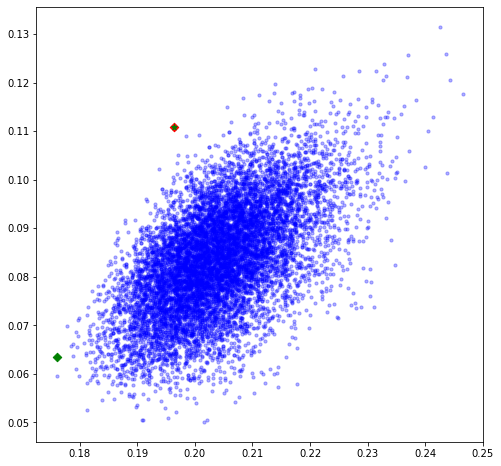

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(8,8))
plt.scatter(data['Riesgo'], data['Retornos'],marker='o', s=10, alpha=0.3, color='blue')
plt.scatter(optimal_portfolio[1],optimal_portfolio[0], color='red', marker='D' )
plt.scatter(min_vol_port[1],min_vol_port[0], color='g', marker='D' )
plt.scatter(optimal_portfolio[1],optimal_portfolio[0], color='green', marker='*' )


## Modelo indice unico

Gráfica del retorno de APPLE contra el retorno del mercado (SP500).

[Text(0.5, 0, 'Retornos Indice'), Text(0, 0.5, 'Retorno Acción')]

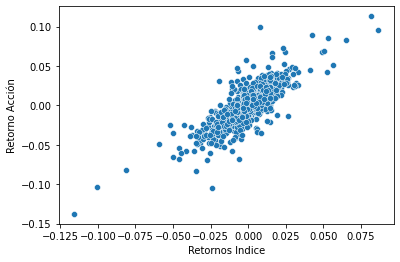

In [ ]:
sns.scatterplot(y=returns_portfolio_ln['AAPL'], x=returns_portfolio_ln['SPY']).set(xlabel="Retornos Indice", ylabel="Retorno Acción")

Graficar el rendimiento de cada activo contra el indice SP500. Además hallar el Beta correspondiente de cada activo. Recordar que el Beta se halla como el coeficiente de la regresión entre el activo i y el mercado. 

Beta  AAPL 1.2025049910775036


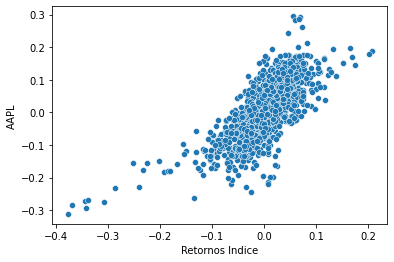

Beta  AMZN 1.0599222960726913


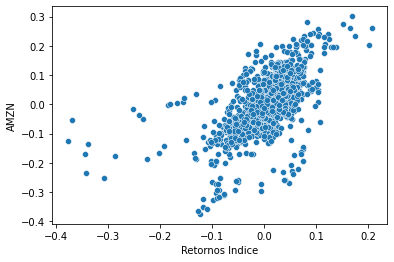

Beta  BAC 1.3237683675630436


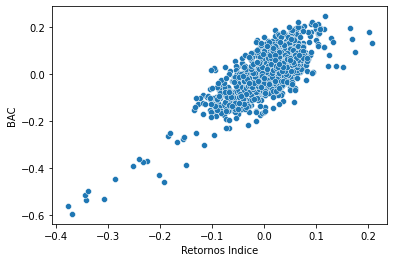

Beta  GOOG 1.0689693213140397


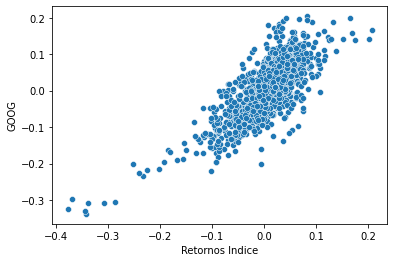

Beta  JNJ 0.49886443839317757


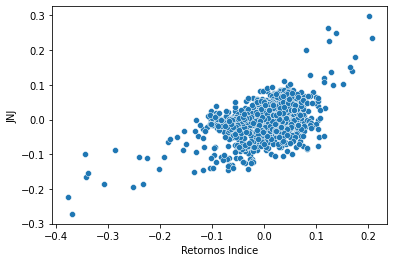

Beta  KO 0.6404662741248691


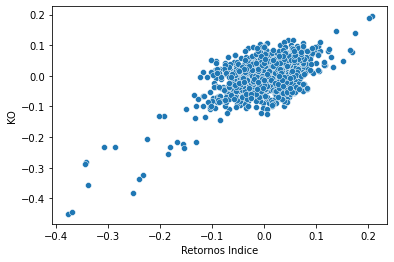

Beta  MSFT 0.9436517184896416


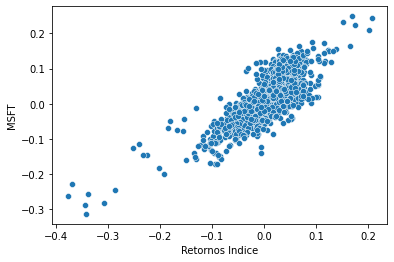

Beta  PFE 0.6282021259535021


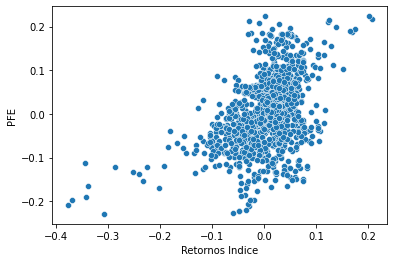

Beta  PG 0.4613810058679418


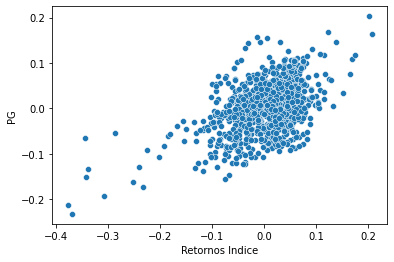

Beta  SPY 1.0


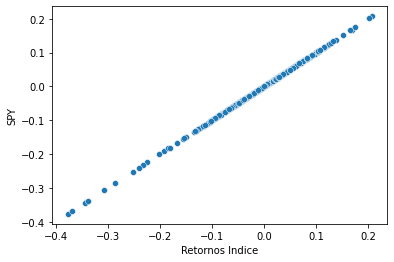

Beta  WMT 0.39625686882982447


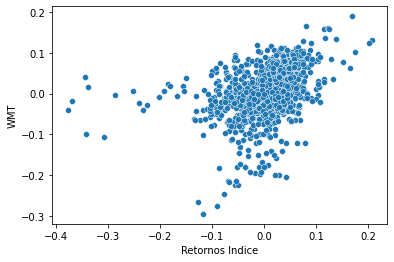

Beta  XOM 1.0063303615751342


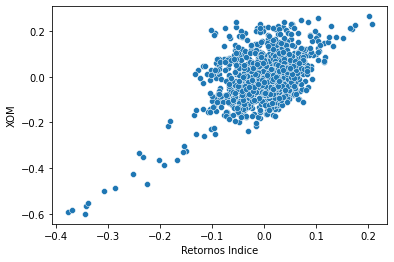

In [ ]:
%matplotlib inline
from scipy import stats
#fig2 = plt.figure(figsize=(15, 7))
#ax2 = fig2.add_subplot(1, 1, 1)
for i in returns_portfolio_ln.columns:
  print("Beta ",i,stats.linregress(y=monthly_returns_ln[i], x=monthly_returns_ln['SPY']).slope)
  sns.scatterplot(y=monthly_returns_ln[i], x=monthly_returns_ln['SPY']).set(xlabel="Retornos Indice", ylabel=i)
  ax2.set_xlabel('Return')
  ax2.set_ylabel('Frequency')
  ax2.set_title('Portfolio Return Distribution')
  plt.show()

Beta AAPL 1.2025049910775036


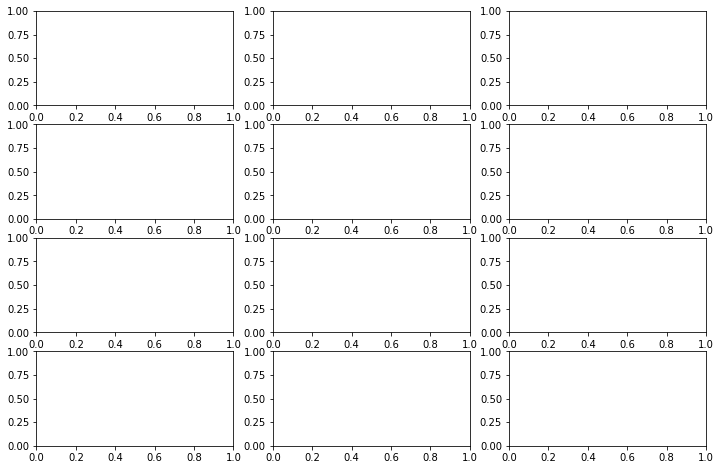

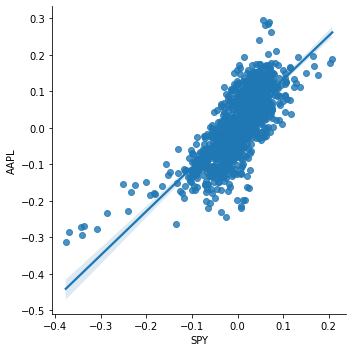

Beta AMZN 1.0599222960726913


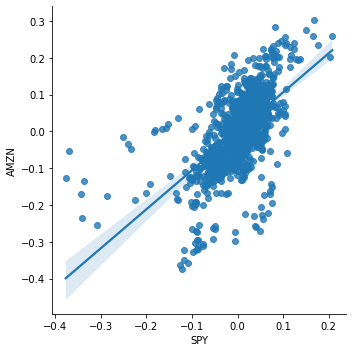

Beta BAC 1.3237683675630436


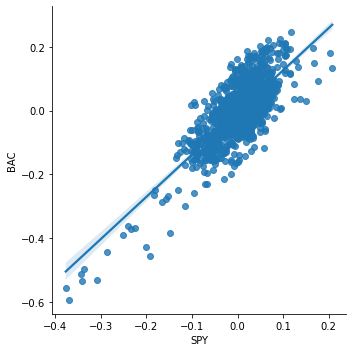

Beta GOOG 1.0689693213140397


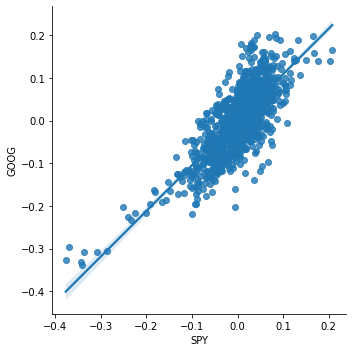

Beta JNJ 0.49886443839317757


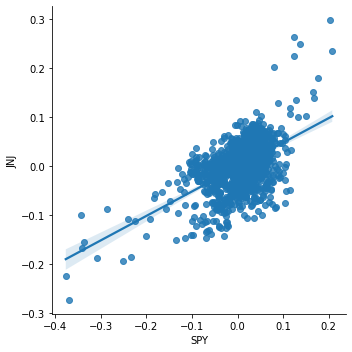

Beta KO 0.6404662741248691


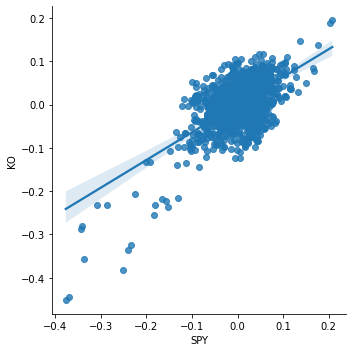

Beta MSFT 0.9436517184896416


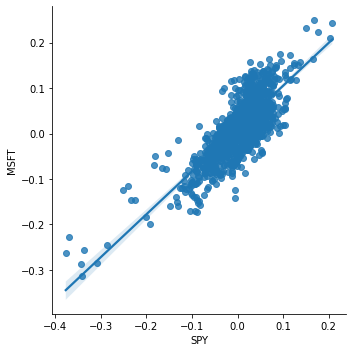

Beta PFE 0.6282021259535021


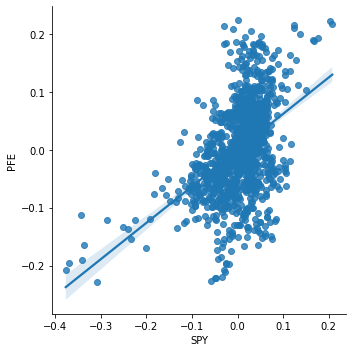

Beta PG 0.4613810058679418


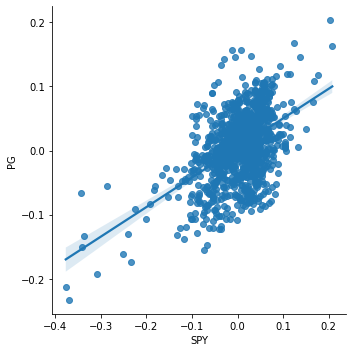

Beta SPY 1.0


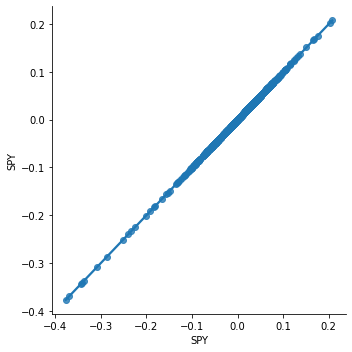

Beta WMT 0.39625686882982447


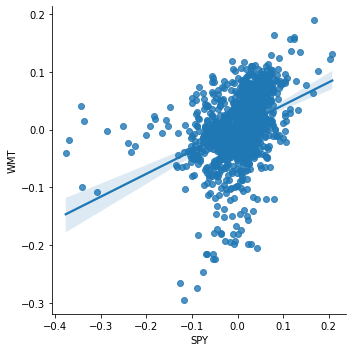

Beta XOM 1.0063303615751342


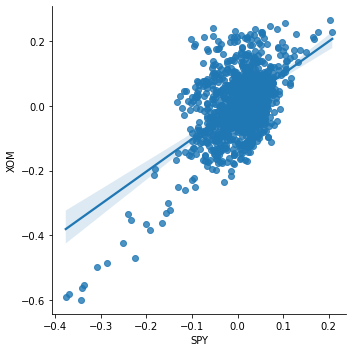

In [ ]:
%matplotlib inline

j=0
for i in returns_portfolio_ln.columns:
  print("Beta",i,stats.linregress(y=monthly_returns_ln[i], x=monthly_returns_ln['SPY']).slope)
  sns.lmplot(data=monthly_returns_ln, y=i, x='SPY')
  ax2.set_xlabel('Return')
  ax2.set_ylabel('Frequency')
  ax2.set_title('Portfolio Return Distribution')
  plt.show()